## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# creating the file path for my ab_data csv file
ab_data_fp = '/Volumes/LACIE SETUP/Data_Science/Udacity_DataAnalyst_NanoDegree_Projects/Practical_Statistics/AnalyzeABTestResults 2/ab_data.csv'

In [3]:
df = pd.read_csv(ab_data_fp)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [5]:
# finding the number of rows, you can also do df.shape[0]
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
# number of unique users by counting user_id column
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
(df['converted']).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# creating the control group dataframe
control_df = df.query('group == "control"')

In [9]:
control_df['landing_page'].value_counts()

old_page    145274
new_page      1928
Name: landing_page, dtype: int64

In [10]:
# setting my control misalignment count
cntrl_ma_cnt = control_df.query('landing_page == "new_page"').count()[0]

In [11]:
# creating the treatment group dataframe
treatment_df = df.query('group == "treatment"')

In [12]:
treatment_df['landing_page'].value_counts()

new_page    145311
old_page      1965
Name: landing_page, dtype: int64

In [13]:
# setting my treatment misalignment count
trmnt_ma_cnt = treatment_df.query('landing_page == "old_page"').count()[0]

In [14]:
message = "Number of times the control received the new page and the treatment the old page: {}"

print(message.format(cntrl_ma_cnt + trmnt_ma_cnt))

Number of times the control received the new page and the treatment the old page: 3893


f. Do any of the rows have missing values?

In [15]:
# There are no missing values within the entire dataset as a whole, given what we see here 
# with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [16]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
# dropping my control group misaligned data
df2 = df.drop(df.query('(group == "control") & (landing_page == "new_page")').index)

In [18]:
# dropping my treatment group misaligned data
df2 = df2.drop(df2.query('(group == "treatment") & (landing_page == "old_page")').index)

In [19]:
# checking to make sure no misaligned data is present in df2
df2.groupby('group')['landing_page'].value_counts()

group      landing_page
control    old_page        145274
treatment  new_page        145311
Name: landing_page, dtype: int64

Sorry..., my own meticulous nature, I wanted to double check and make sure I documented doing
so, but I unfortunately didn't see the code below. Ehhh, just another way for me to check.

In [20]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [21]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
df2['user_id'].mode()

0    773192
dtype: int64

c. What is the row information for the repeat **user_id**? 

In [23]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [24]:
# querying just one of these duplicate rows, to single out for deletion in just a moment
df2.query('(index == "2893") & (user_id == "773192")')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [25]:
# dropping the duplicate row with user_id == 773192
df2 = df2.drop(df2.query('(index == "2893") & (user_id == "773192")').index)

In [26]:
# double checking to make sure it worked
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [27]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [28]:
cntrl_cr = df2.query('group == "control"')['converted'].mean()

cntrl_cr

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [29]:
trtmnt_cr = df2.query('group == "treatment"')['converted'].mean()

trtmnt_cr

0.11880806551510564

d. What is the probability that an individual received the new page?

In [30]:
p_nwpg = (df2.query('landing_page == "new_page"').count()[0]) / df2.shape[0]
          
p_nwpg

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the evidence above in my exploration of dataset df2, I would have to say there is not sufficient enough
evidence to say that the new treatment page leads to more conversions; in other words, we would fail to reject the 
Null Hypothesis: 

    - the null hypothesis can be defined here as H_0: treatment_{new_page} - control_{old_page} <= 0
    - here, the mean coversion rate values would respectively be: 0.1188 - 0.1204
    - if our H_0 value is less than or equal to zero, this would suggest we fail to reject the null hypothesis
      as the control group converted just as much, if not more than the treatment group

As we can see, based on our mean difference of the conversion rates for both groups, even though the treatment group has a larger sample size by 36, the conversion rate of the control group is slightly higer by .0016%. Given that we 
know this now, it wouldnt be practical to say that the new treatment page leads to more conversions because there just isnt enough data to support this.  Maybe the next steps would be garner a larger sample size and conduct the analysis then.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null and Alternative(alt) Hypotheses: 

Null Hypothesis:
**$H_{null}$: $p_{new}$ - $p_{old}$ <= 0**

Alternative Hypothesis:
**$H_{alt}$: $p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [31]:
p_new = df2['converted'].mean()

p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [32]:
p_old = df2['converted'].mean()

p_old

0.11959708724499628

c. What is $n_{new}$?

In [33]:
n_new = df2.query('landing_page == "new_page"').user_id.nunique()

n_new

145310

d. What is $n_{old}$?

In [34]:
n_old = df2.query('landing_page == "old_page"').user_id.nunique()

n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
new_page_converted = np.random.binomial(1, 0.1196, int(1.45310e5))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
old_page_converted = np.random.binomial(1, 0.1196, int(1.45274e5))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
# calculating the observed difference in proportion
obs_diff = (new_page_converted.mean() - old_page_converted.mean())

obs_diff

0.001002847926548256

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [38]:
# creating a sample of df2 so as not to influence the integrity of of our doctored dataset
smp_df2 = df2.sample(df2.shape[0])

In [39]:
p_diffs = []
size = smp_df2.shape[0]

for i in range(10000):
    new_page_converted = np.random.binomial(1, 0.1196, int(1.45310e5))
    old_page_converted = np.random.binomial(1, 0.1196, int(1.45274e5))
    obs_diff = (new_page_converted.mean() - old_page_converted.mean())
    p_diffs.append(obs_diff)

In [40]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

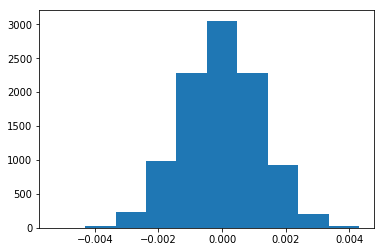

In [41]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

In [48]:
act_diff_obs = (trtmnt_cr - cntrl_cr)

act_diff_obs

-0.0015782389853555567

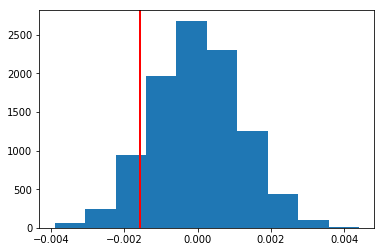

In [80]:
# plotting the observed statistic
plt.hist(null_vals);
plt.axvline(x=act_diff_obs, color='r', linewidth=2);

In [50]:
# finding the p-value
(null_vals > act_diff_obs).mean()

0.9035

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

What we did here, is use a sampling distribution to simulate the distrubution under the null by creating a random normal distribution centered on 0, using p_diffs `.std()` and `.size` as the parameters. We could then compute the 
p-values by finding the proportion of values in the null distrubution that were greater than our actual observed difference. 

I used plt.axvline method to show a vertical line of our ab_data.csv dataset's actual observed difference in conversion rate against our normal distrubution under the null.  This will help us visualize the proportion of null values greater than the mean of p_diffs.

Given that our p-value (.9035) is greater than the Type 1 error rate, .05 or 5%, it seems highly likely that our statistic is from the Null. We do not have evidence that the converted rate increases when users land on 'new_page' versus 'old_page'.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [51]:
import statsmodels.api as sm


/Users/calvertlouden/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [52]:
convert_old = df2.query('(group == "control") & (landing_page == "old_page") \
                        & (converted == "1")').count()[0]
convert_old

17489

In [53]:
convert_new = df2.query('(group == "treatment") & (landing_page == "new_page") \
                        & (converted == "1")').count()[0]
convert_new

17264

In [54]:
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_old

145274

In [55]:
n_new = df2.query('landing_page == "new_page"').user_id.nunique()
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [56]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], \
                                              alternative='larger')

z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score here indicates that the predictor variable's relationship to the group of old and new pages is -1.3109 
standard deviations from the mean of the group. The p-value here is almost identical, computing that .9051 or 90% 
of the sample displays the proportion of values in the null distribution that are greater than the actual observed difference.  

Based on these results, I would have to say they do agree with my findings from parts j and k.  The p-value calculated here is -0.0016 from the p-value calculted in part j.  The actual observed difference we calculated in part j is 
-0.0015782389853555567, which when rounded is equivalent to the difference in p-values calculated in j and here in m. 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we are comparing two categorical variables to one another, (converted, not_converted), a multiple linear regression should do the trick.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [57]:
# creating dummy variables for our categorical columns
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

df2[['old_page', 'new_page']] = pd.get_dummies(df2['landing_page'])

In [58]:
# renaming the treatment dummy variable column to ab_page
df2 = df2.rename(columns={'treatment':'ab_page'})

In [59]:
df2.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page,old_page,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


In [60]:
# adding an intercept column
df2['intercept'] = 1 

In [61]:
# checking to make sure my dummy variables were created properly
df2.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page,old_page,new_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [62]:
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Mon, 17 Sep 2018   Prob (F-statistic):              0.190
Time:                        14:59:33   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with the ab_page is 0.190. 

The Null and Alternative Hypotheses for this regression model:

$H_0: B_1 = B_1,_0$

$H_1: B_1 \neq B_1,_0$

The difference here between this regression model's null/alternative hypothesis vs the hypothesis of Part II, is that
with the regression model, considering the null hypothesis, we are trying to prove the treatment group is equal to that of the control, where as in Part II, the null hypothesis was trying to prove the treatment group is less than 
or equal to the performance of the control group.  And as for the alternative hypothesis, here with our regression 
model, we are trying to prove the treament groups performance is not equal to that of the control's where as in Part II, the alternative hypothesis was to prove the treatment groups performance was greater than that of the control's.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It's always a good idea to consider the possibility of other factors/variables within your dataset having a linear relationship. Using linear models helps us identify if there is any
statistically significant linear relationships between particular variables and the target/
response variable. This type of analysis can lead to better predictive models, when all/most
variables have been considered. 

You do however have to be careful of the data you select for analysis. There can be 
disadvantages to adding too much to the regression model. For example, outliers/leverage points, which might even be user input errors, can have a large influence on your calculations. Multi-collinearity is also another pitfall to watch out for. Here, you may have 
selected predictor variables for your regression model, not knowing they are correlated with
one another. This can lead to coefficient calculations being flip flopped and rendering in 
opposite directions than what we would expect from our data.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [64]:
countries_fp = '/Volumes/LACIE SETUP/Data_Science/Udacity_DataAnalyst_NanoDegree_Projects/Practical_Statistics/AnalyzeABTestResults 2/countries.csv'

countries_df = pd.read_csv(countries_fp)
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [65]:
df_new.head()

,country,timestamp,group,landing_page,converted,control,ab_page,old_page,new_page,intercept
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0,1


In [66]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [67]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [68]:
cntry_lm = sm.OLS(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
cntry_rslts = cntry_lm.fit()
cntry_rslts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Mon, 17 Sep 2018   Prob (F-statistic):              0.201
Time:                        15:30:16   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
UK             0.0053      0.003      1.787      0.074      -0.001       0.011
CA             0.0042      0.003      1.516      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on these statistical results, it appears that country does have a statistically 
significant linear relationship with the response variable or target, the converted column. 
Since the slopes of both the UK and CA are different than zero, the alternative is true and we
can reject the null hypothesis, which is conversion rate is not affected by which country an 
individual lives in. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [70]:
# coding the interactions between page and country
df_new['CA_and_ab_page'] = df_new['CA'] * df_new['ab_page']

df_new['UK_and_ab_page'] = df_new['UK'] * df_new['ab_page']

df_new['US_and_ab_page'] = df_new['US'] * df_new['ab_page']

In [82]:
### Fit Your Linear Model And Obtain the Results
pgctry_lm = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'CA_and_ab_page', 
                                                'UK_and_ab_page']])
pgctry_rslts = pgctry_lm.fit()
pgctry_rslts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Mon, 17 Sep 2018   Prob (F-statistic):              0.197
Time:                        22:16:36   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.1188      0.004     31.057      0.000       0.111       0.126
ab_page           -0.0069      0.005     -1.277      0.202      -0.017       0.004
CA                 0.0018      0.004      0.467      0.641      -0.006       0.010
UK                 0.0012      0.004      0.296      0.767      -0.007       0.009
CA_and_ab_page     0.0047      0.006      0.845      0.398      -0.006       0.016
UK_and_ab_page     0.0080      0.006      1.360      0.174      -0.004       0.020
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the OLS Regression summary above, we can conclude that the interatction between page and country is 
statistically significant due to the difference in slopes for each country coefficient. Including interactions within our regression model allows us a closer look at the way page is related to conversion and how it differs depending on the country. 

With 'US' as my baseline and the slopes/coefficients of each country and interaction are different than zero, we can conclude the alternative is true, and we can reject the null hypothesis, validating our previous regression model with no interactions included in our analysis.  

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

### Resources

- Complete Python Masterclass with Tim Buchalka, Jean-Paul Roberts (Udemy)
- Learning Python for Data Analysis and Visualization with Jose Portilla (Udemy)
- Python Crash Course with Eric Matthes
- Udacity Lessons
- Google/Stack Overflow
- Udacity Slack Platform